<a href="https://colab.research.google.com/github/kiakass/share/blob/master/onehot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

le=LabelEncoder()
oe=OneHotEncoder(sparse=False)

In [13]:
from google.colab import files
Upload = files.upload()
df=pd.read_csv("bank.csv", delimiter=",")

Saving bank.csv to bank (5).csv


In [14]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Y
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


In [15]:
# 1.숫자형 클래스로 변환
bank_le=df.Education         # 문자 범주형 column, 알파벳순으로 숫자부여
le.fit(df.Education)  # 변수 및 params 선택
Y=le.transform(bank_le)      # 변환
Y_class=Y.reshape(-1,1)
Y_class

array([[0],
       [0],
       [0],
       ...,
       [2],
       [1],
       [0]])

In [16]:
# 2. One hot encoding
oe.fit(Y_class)
Y_class_onehot = oe.transform(Y_class)
Y_class_onehot

# df2=pd.DataFrame(Y_class_onehot.astype(int), columns=['Edu_G','Edu_P','Edu_U'])
# pd.concat([df,df2], axis=1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

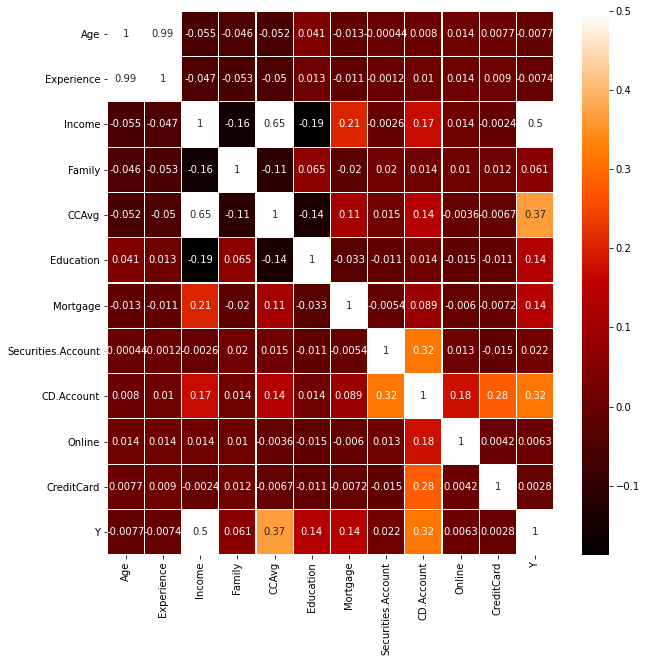

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

fig.show()

In [18]:
df2=[]
df2=pd.DataFrame(Y_class_onehot.astype(int), columns=['Edu_G','Edu_P','Edu_U'])
df=pd.concat([df,df2], axis=1)

In [19]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Y,Edu_G,Edu_P,Edu_U
0,25,1,49,4,1.6,1,0,1,0,0,0,0,1,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,1,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,2,0,0,0,1,0,0,0,1,0
